In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#a = train_df['Pclass'].replace({1:'A', 2: 'B',3:'C'})
#train_df['Pclass1'] = a
#train_df = train_df.drop(['Pclass'],axis=1)
#train_df.head()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


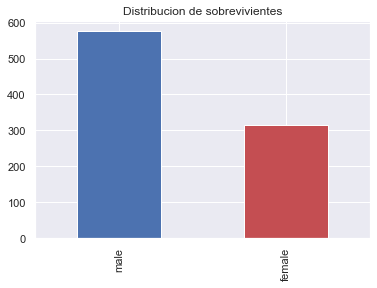

In [5]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribucion de sobrevivientes')
plt.show()

In [6]:
from sklearn import preprocessing    #Transformamos la columna Sex en 0 y 1
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())  #Llenamos datos faltantes con la mediana de la columna
#Se utiliza la mediana porque es una de las medidas de tendencia central que menos se afecta por los datos atípicos.
train_df['Embarked'] = train_df['Embarked'].fillna('S') 
#S porque representa el embarque en la ciudad de South Hampton, en donde más personas se unieron al viaje.

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)   #Columnas a quitar e identificadores

categorical_cols = [cname for cname in train_predictors.columns if            
                        train_predictors[cname].nunique() < 10 and
                        train_predictors[cname].dtype == 'object'
                   
                   ]

In [10]:
train_predictors.head()
categorical_cols      #Solo aparecen Sex y Enbarked como V.categoricas, faltaría Pclass

['Sex', 'Embarked']

In [11]:
numerical_cols = [cname for cname in train_predictors.columns if
                   train_predictors[cname].dtype in ['int64', 'float64']
                 ]

In [12]:
numerical_cols     #Pclass no es numerica 

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
my_cols = categorical_cols + numerical_cols

train_predictors = train_predictors[my_cols]
train_predictors.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500


In [14]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
y_target = train_df['Survived'].values      #Varible a predecir
x_features_one = dummy_encoded_train_predictors.values

In [17]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size = .25, random_state = 1)

In [18]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)

In [19]:
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.9798


In [20]:
from io import StringIO        #conda install graphviz
from IPython.display import Image, display
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"    #Se utilza esto para que jale graghviz
out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True